# 0. Imports and constants (run config)

In [1]:
from copy import deepcopy

from copulae.archimedean import ClaytonCopula, FrankCopula, GumbelCopula
from copulae.elliptical import GaussianCopula, StudentCopula
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from components.functions.portfolio import portfolio_return, portfolio_volatility
from components.transformers.rate_transformer import RateTransformer
from components.transformers.log_transformer import LognTransformer
from components.wrappers.cvxpy_wrapper import CVXPYWrapper
from components.wrappers.kde_wrapper import KernelDensityWrapper

In [2]:
X_TRAIN_START = '2010-01-01'
X_TRAIN_END = '2022-12-30'
X_TEST_START = '2023-01-02'
X_TEST_END = '2023-02-28'


SELECTED_PORTFOLIOS = {
    'P1': ['Nickel', 'Copper'],
    'P2': ['Brent Oil', 'Gas US'],
    'P3': ['Gold', 'Silver'],
    'P4': ['Nickel', 'Copper', 'Gold'],
    'P5': ['Nickel', 'Copper', 'Silver'],
    'P6': ['Brent Oil', 'Gas US', 'Gold'],
    'P7': ['Brent Oil', 'Gas US', 'Silver']
}

SELECTED_BENCHMARK = 'SPGSCI'

# KDE configuration
# 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine',
KERNEL = 'epanechnikov'
# 'silverman', 'scott', float
KERNEL_BANDWIDTH = 'silverman'


# 'gaussian', 'student', 'frank', 'clayton', 'gumbel'
COPULA = 'student'
# Copula
copula_dict = {
    'gaussian': GaussianCopula,
    'student': StudentCopula,
    'frank': FrankCopula,
    'clayton': ClaytonCopula,
    'gumbel': GumbelCopula
}

# N_COPULA_SIMULATIONS = 10000
RANDOM_SEED = 5

# Portfolio simulations
WEIGHT_SIMULATIONS = 10000

# 1. Data load and prep

In [3]:
# load prices from dataset
df = pd.read_excel('data/BazaMSA.xlsx', sheet_name='Ceny')
# Dates as index
df.set_index('Dates', inplace=True)

# Select only necessary columns
assets_in_portfolios = list(set([i for j in SELECTED_PORTFOLIOS.values() for i in j]))
assets_in_portfolios.append(SELECTED_BENCHMARK)
df = df[assets_in_portfolios]

# Comprehensive scikitlearn `Pipeline` that first creates the rates
# and then performs logn on top
log_rate_pipe = Pipeline(
    steps=[
        ('rates', RateTransformer(period=1)),
        ('logn', LognTransformer())
    ]
)
df_transformed = log_rate_pipe.fit_transform(X=df)
# Drop all the `na` values
df_transformed.dropna(inplace=True)

# Select dataset to train (fit) and test
X_train = df_transformed.loc[X_TRAIN_START:X_TRAIN_END]
X_test = df_transformed.loc[X_TEST_START:X_TEST_END]

f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


# 2. Nonparametric kernel density estimation

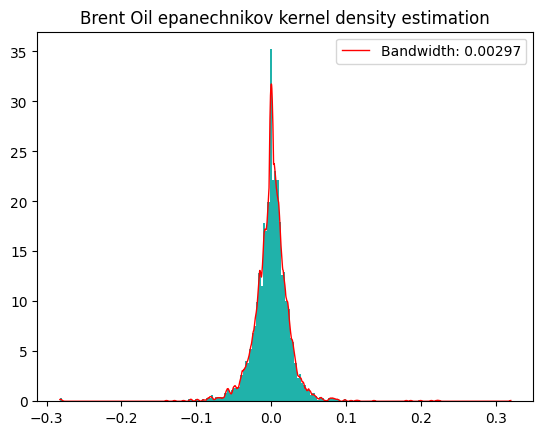

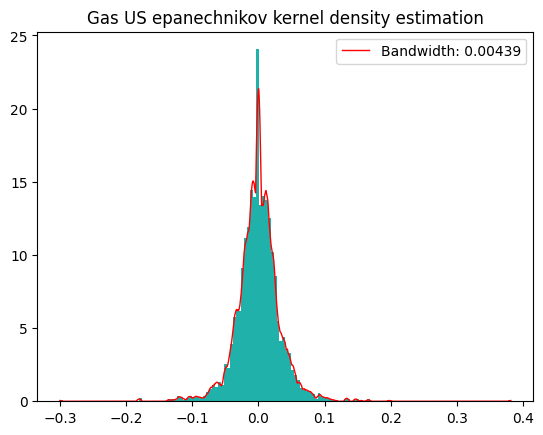

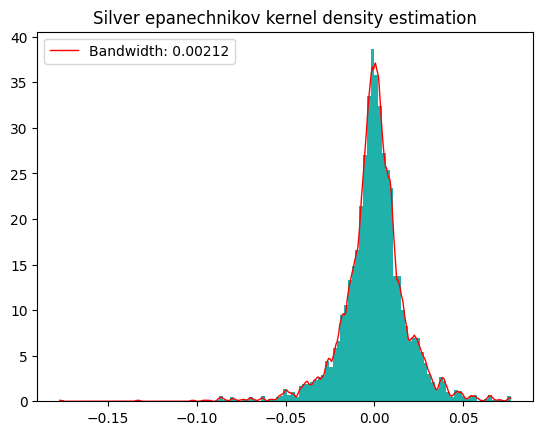

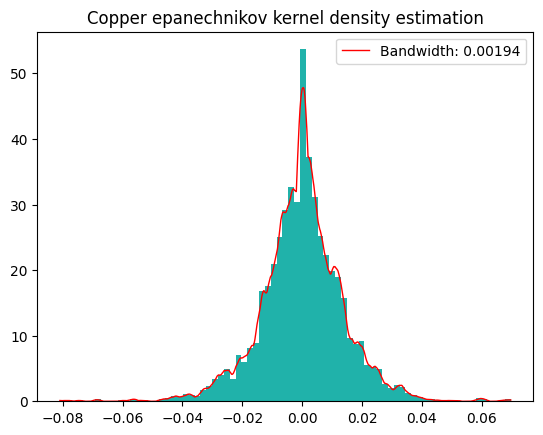

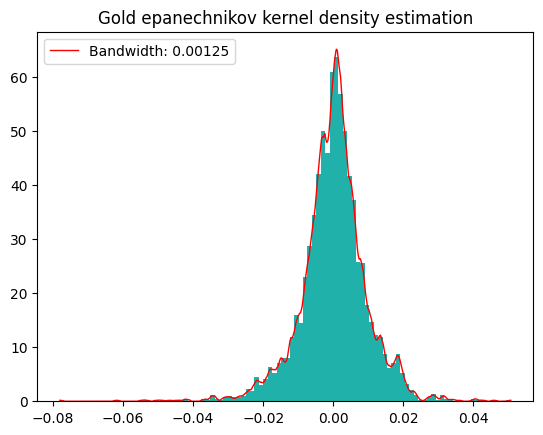

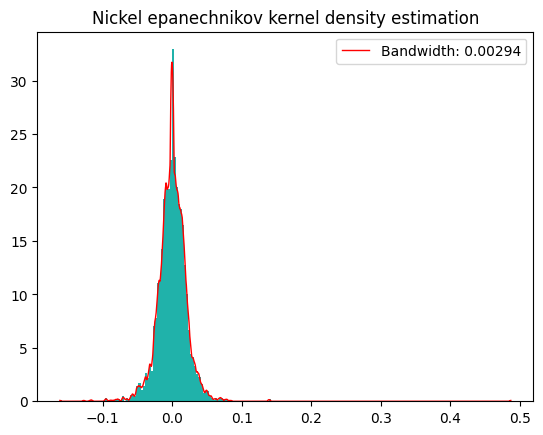

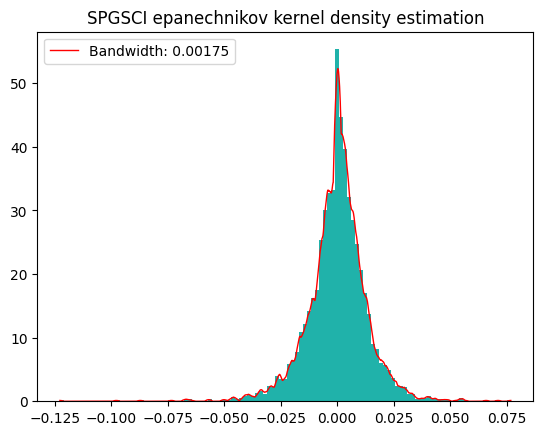

In [4]:
kdw = KernelDensityWrapper(kernel=KERNEL, bandwidth=KERNEL_BANDWIDTH)
kdw.fit(X_train)

X_train_cdf_vals = kdw.cdf(X_train)

for asset in assets_in_portfolios:
    plt.title(f'{asset} {KERNEL} kernel density estimation')
    plt.hist(X_train[asset], density=True, color='lightseagreen', bins='auto')
    plt.plot(
        kdw._x_ranges[asset],
        kdw.density_functions[asset],
        color='red',
        linewidth=1,
        label=f'Bandwidth: {round(kdw.bandwidths[asset], 5)}')
    plt.legend()
    plt.show()

# 3. Copula

P1: ['Nickel', 'Copper']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\elliptical\student.py:176: RuntimeWarning: invalid value encountered in subtract
  d = mvt.logpdf(q, cov=sigma, df=df) - t.logpdf(q, df=df).sum(1)


            Nickel       Copper
count  3388.000000  3388.000000
mean      0.501595     0.500596
std       0.288286     0.288301
min       0.000014     0.000005
25%       0.252589     0.252413
50%       0.496716     0.494437
75%       0.750556     0.749787
max       1.000000     1.000000
Student Copula Summary
Student Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.554649
0.554649 1.000000



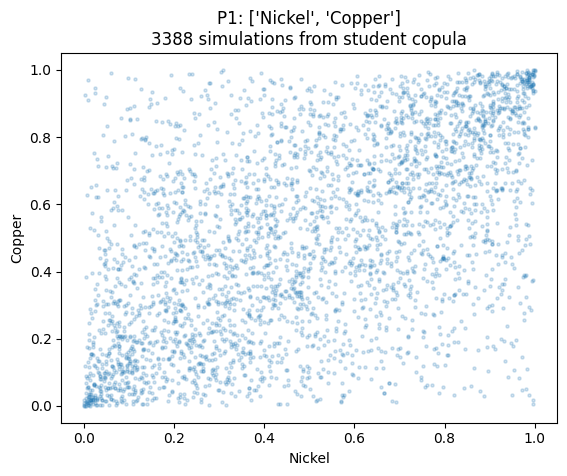

P2: ['Brent Oil', 'Gas US']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\elliptical\student.py:176: RuntimeWarning: invalid value encountered in subtract
  d = mvt.logpdf(q, cov=sigma, df=df) - t.logpdf(q, df=df).sum(1)


         Brent Oil       Gas US
count  3388.000000  3388.000000
mean      0.501316     0.501121
std       0.288368     0.288277
min       0.000032     0.000010
25%       0.252541     0.250235
50%       0.484679     0.506638
75%       0.752533     0.749521
max       1.000000     1.000000
Student Copula Summary
Student Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.00000 0.10552
0.10552 1.00000



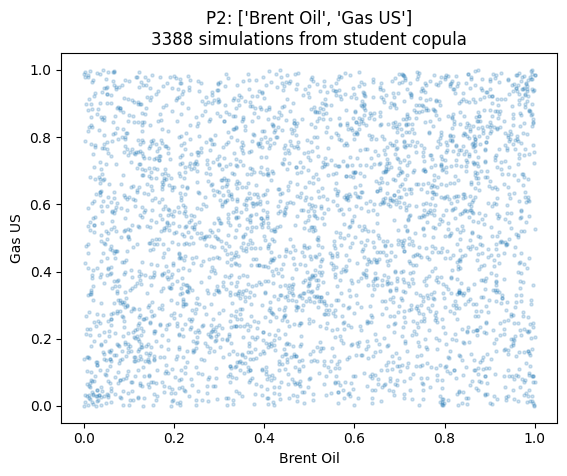

P3: ['Gold', 'Silver']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)


              Gold       Silver
count  3388.000000  3388.000000
mean      0.500689     0.500883
std       0.288347     0.288418
min       0.000007     0.000008
25%       0.253182     0.254240
50%       0.499630     0.500298
75%       0.749555     0.748668
max       1.000000     1.000000
Student Copula Summary
Student Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.795813
0.795813 1.000000



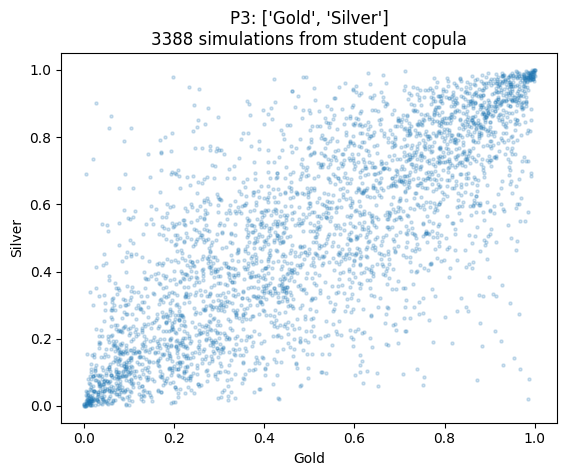

P4: ['Nickel', 'Copper', 'Gold']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\elliptical\student.py:176: RuntimeWarning: invalid value encountered in subtract
  d = mvt.logpdf(q, cov=sigma, df=df) - t.logpdf(q, df=df).sum(1)


            Nickel       Copper         Gold
count  3388.000000  3388.000000  3388.000000
mean      0.501595     0.500596     0.500689
std       0.288286     0.288301     0.288347
min       0.000014     0.000005     0.000007
25%       0.252589     0.252413     0.253182
50%       0.496716     0.494437     0.499630
75%       0.750556     0.749787     0.749555
max       1.000000     1.000000     1.000000
Student Copula Summary
Student Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.554649 0.194677
0.554649 1.000000 0.241810
0.194677 0.241810 1.000000



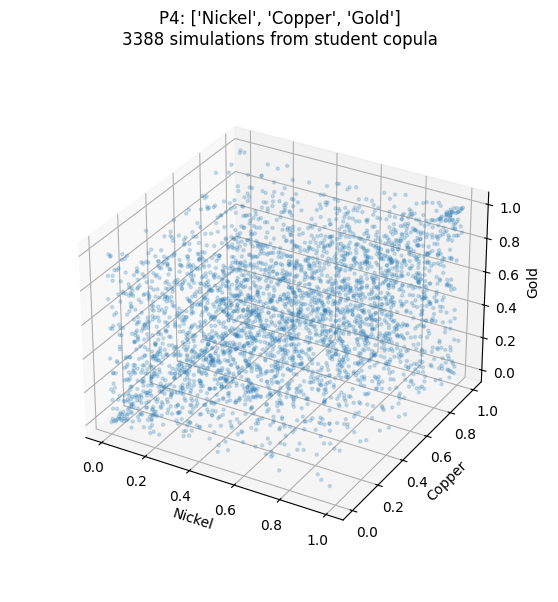

P5: ['Nickel', 'Copper', 'Silver']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\elliptical\student.py:176: RuntimeWarning: invalid value encountered in subtract
  d = mvt.logpdf(q, cov=sigma, df=df) - t.logpdf(q, df=df).sum(1)


            Nickel       Copper       Silver
count  3388.000000  3388.000000  3388.000000
mean      0.501595     0.500596     0.500883
std       0.288286     0.288301     0.288418
min       0.000014     0.000005     0.000008
25%       0.252589     0.252413     0.254240
50%       0.496716     0.494437     0.500298
75%       0.750556     0.749787     0.748668
max       1.000000     1.000000     1.000000
Student Copula Summary
Student Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.554649 0.296202
0.554649 1.000000 0.382720
0.296202 0.382720 1.000000



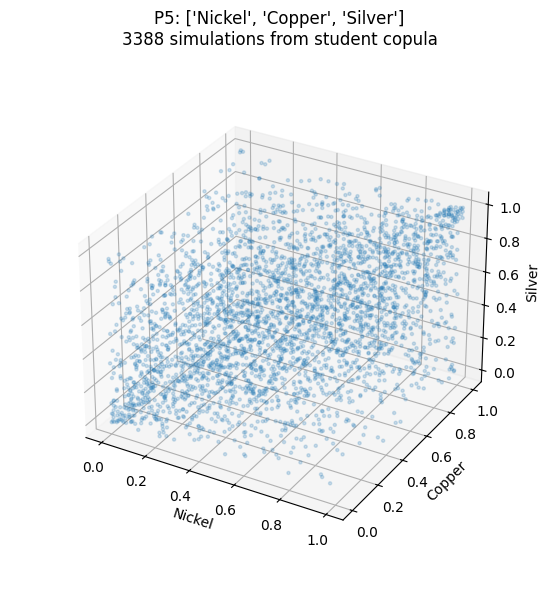

P6: ['Brent Oil', 'Gas US', 'Gold']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))
f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\elliptical\student.py:176: RuntimeWarning: invalid value encountered in subtract
  d = mvt.logpdf(q, cov=sigma, df=df) - t.logpdf(q, df=df).sum(1)


         Brent Oil       Gas US         Gold
count  3388.000000  3388.000000  3388.000000
mean      0.501316     0.501121     0.500689
std       0.288368     0.288277     0.288347
min       0.000032     0.000010     0.000007
25%       0.252541     0.250235     0.253182
50%       0.484679     0.506638     0.499630
75%       0.752533     0.749521     0.749555
max       1.000000     1.000000     1.000000
Student Copula Summary
Student Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.105520 0.143958
0.105520 1.000000 0.000909
0.143958 0.000909 1.000000



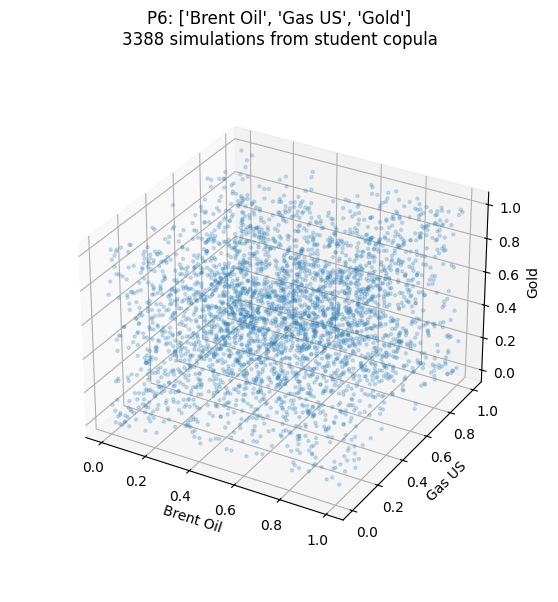

P7: ['Brent Oil', 'Gas US', 'Silver']


f:\Apps\anaconda3\envs\semiparametric-test\Lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: invalid value encountered in matmul
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)


         Brent Oil       Gas US       Silver
count  3388.000000  3388.000000  3388.000000
mean      0.501316     0.501121     0.500883
std       0.288368     0.288277     0.288418
min       0.000032     0.000010     0.000008
25%       0.252541     0.250235     0.254240
50%       0.484679     0.506638     0.500298
75%       0.752533     0.749521     0.748668
max       1.000000     1.000000     1.000000
Student Copula Summary
Student Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.669

 Correlation Matrix 
1.000000 0.105520 0.213361
0.105520 1.000000 0.018516
0.213361 0.018516 1.000000



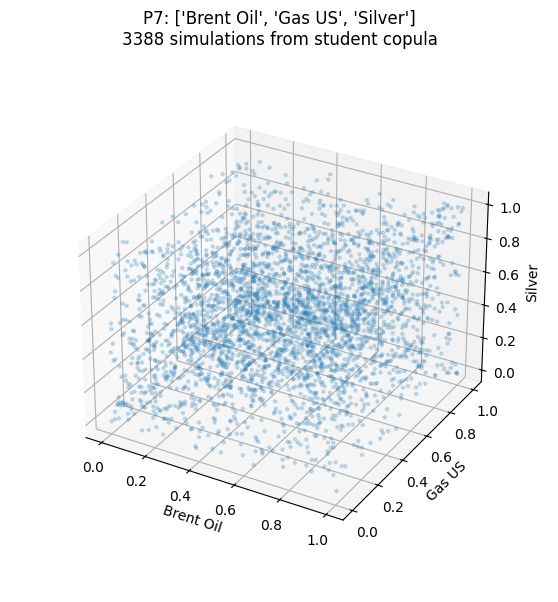

In [5]:
copula_simulation_values = {}
for portfolio, assets in SELECTED_PORTFOLIOS.items():
    print(f'{portfolio}: {assets}')
    copula = copula_dict[COPULA](dim=len(assets))
    copula.fit(X_train_cdf_vals[assets], to_pobs=False, verbose=False)
    print(copula.summary())

    copula_simulations = copula.random(n=len(X_train_cdf_vals), seed=RANDOM_SEED)
    copula_simulation_values[portfolio] = kdw.ppf(copula_simulations)

    if len(assets)==2:
        plt.scatter(
            copula_simulations[assets[0]],
            copula_simulations[assets[1]],
            alpha=0.2,
            s=5)
        plt.xlabel(assets[0])
        plt.ylabel(assets[1])
        plt.title(
            f'{portfolio}: {assets}\n'
            f'{len(X_train)} simulations from {COPULA} copula')
        plt.show()
    elif len(assets)==3:

        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(
            copula_simulations[assets[0]],
            copula_simulations[assets[1]],
            copula_simulations[assets[2]],
            s=5, alpha=0.2)
        ax.set_title(f'{portfolio}: {assets}\n'
            f'{len(X_train)} simulations from {COPULA} copula')
        ax.set_xlabel(assets[0])
        ax.set_ylabel(assets[1])
        ax.set_zlabel(assets[2], rotation=90)
        ax.set_box_aspect(aspect=None, zoom=0.85)
        #ax.zaxis.labelpad=-0.6
        plt.show()
    else: continue

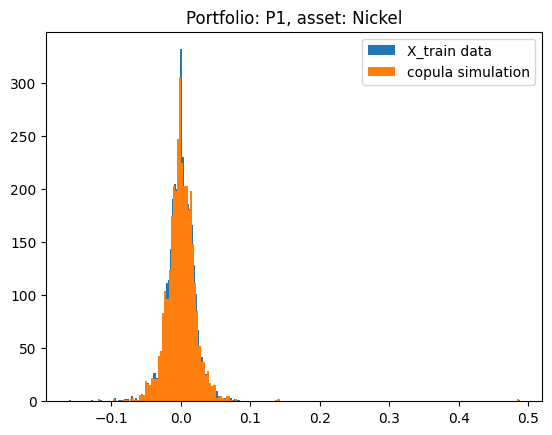

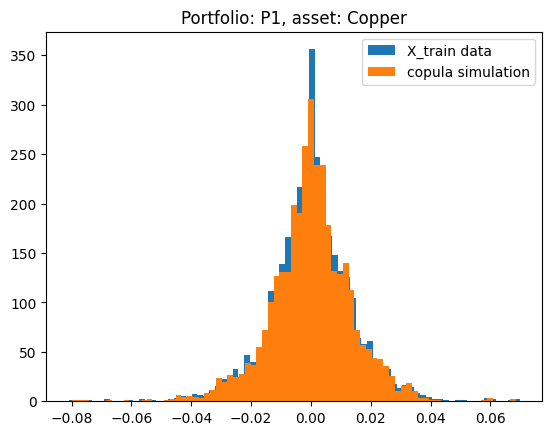

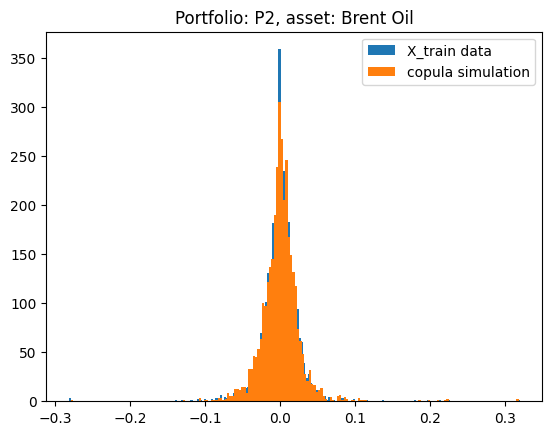

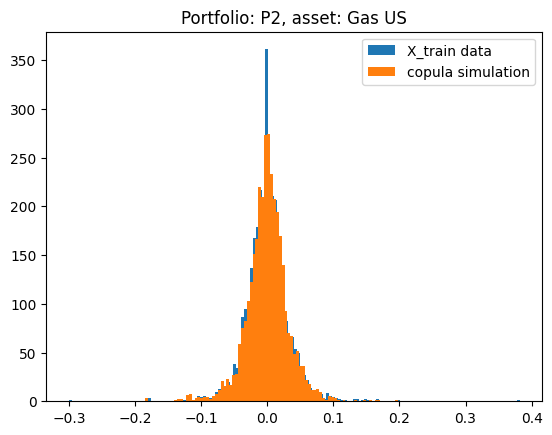

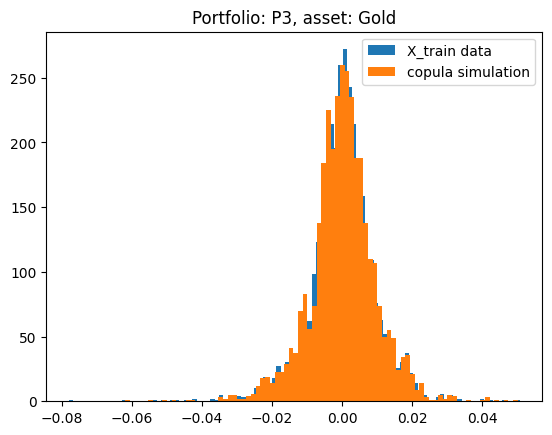

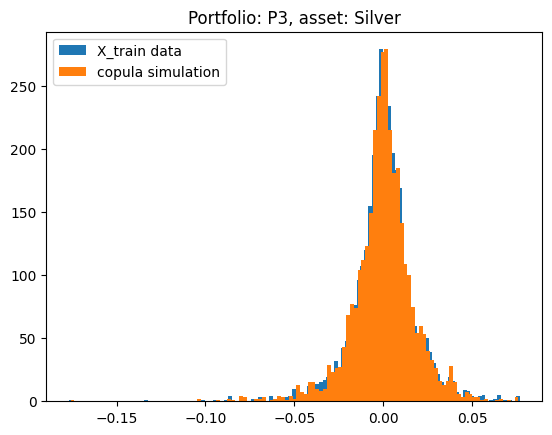

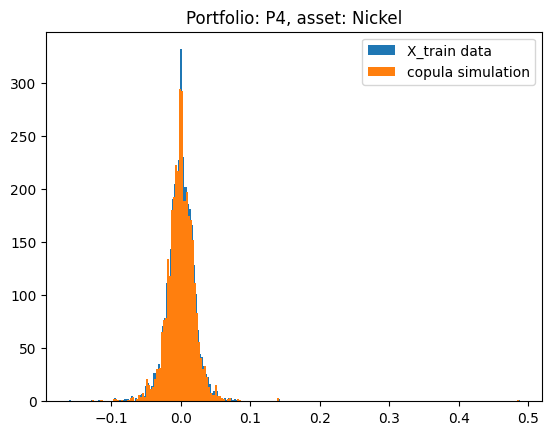

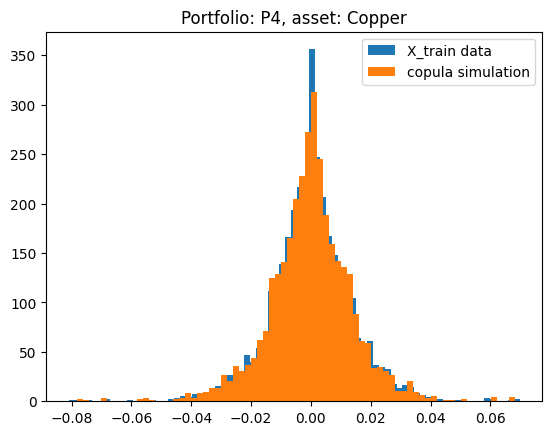

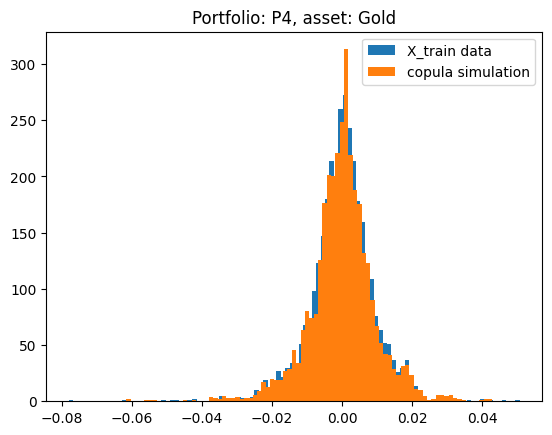

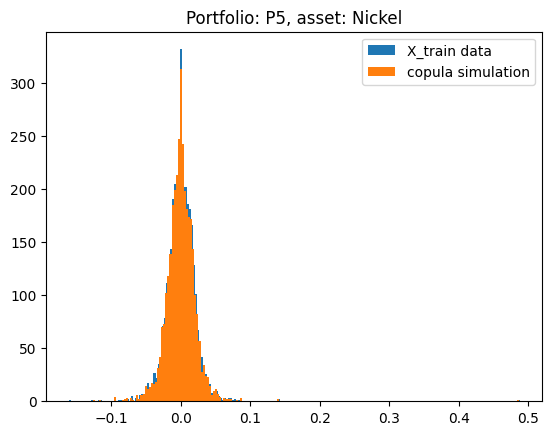

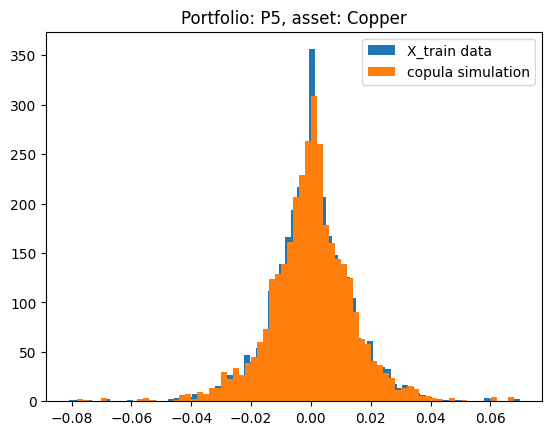

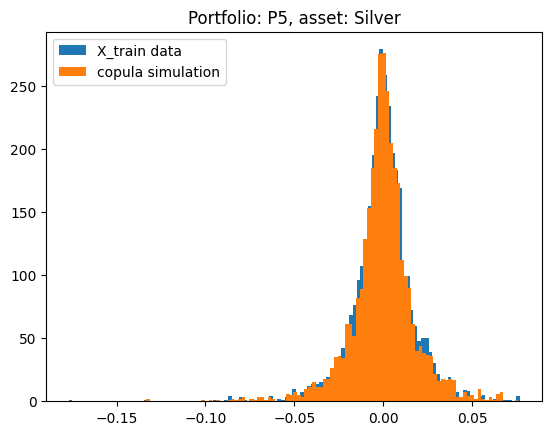

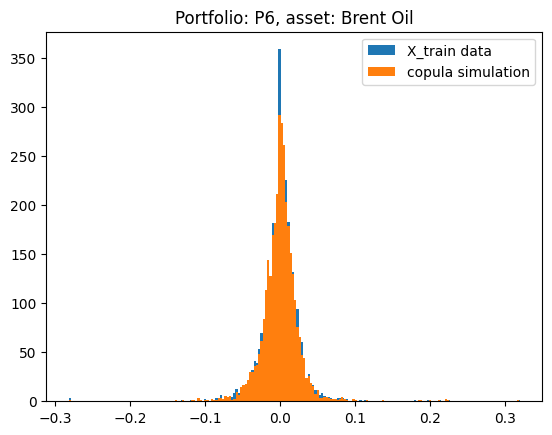

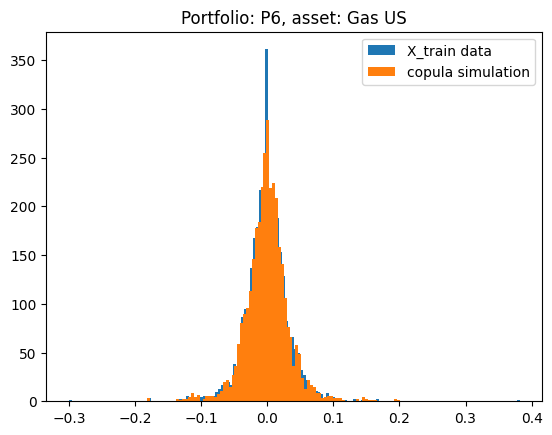

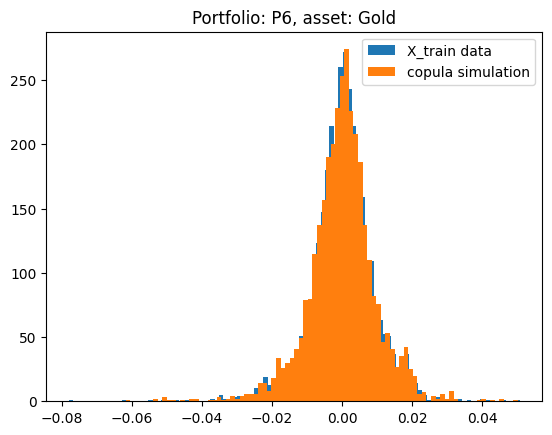

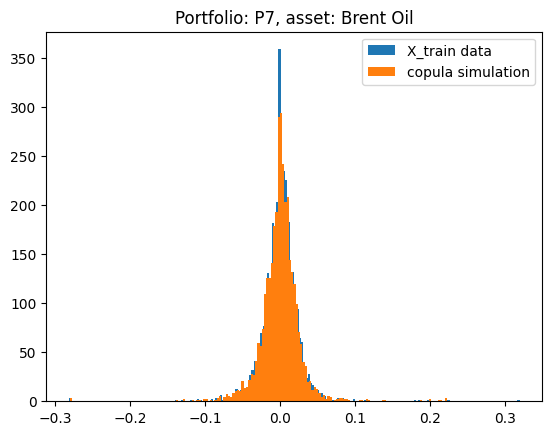

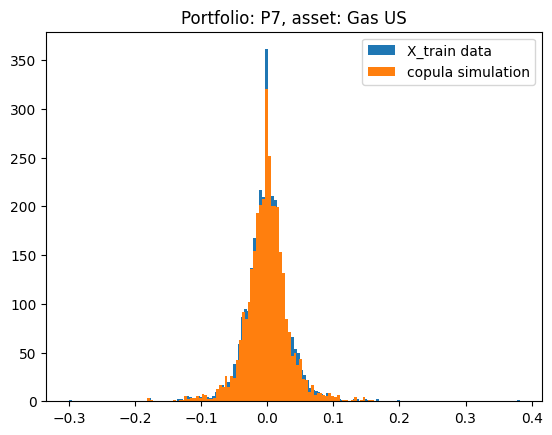

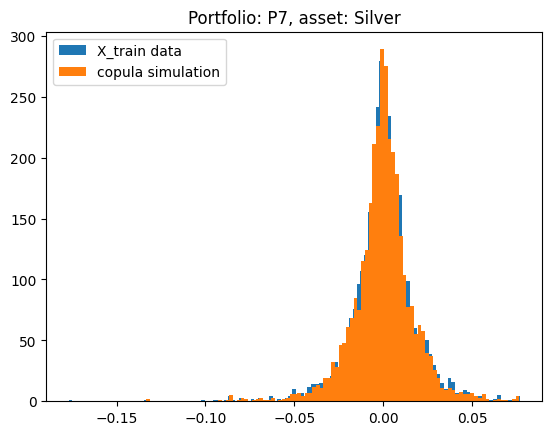

In [6]:
for portfolio_id, df in copula_simulation_values.items():
    for asset in df.columns:
        plt.title(f'Portfolio: {portfolio_id}, asset: {asset}')
        plt.hist(X_train[asset], bins='auto', label='X_train data')
        plt.hist(df[asset], bins='auto', label='copula simulation')
        plt.legend()
        plt.show()

# 4. Portfolio weight optimizations for classical Markowitz and Semiparametric

In [7]:
np.random.seed(RANDOM_SEED)

markowitz_weights = {}
semiparametric_weights = {}
for portfolio, assets in SELECTED_PORTFOLIOS.items():
    # classic markowitz
    model_markowitz = CVXPYWrapper()
    model_markowitz.fit(X_train[assets])
    markowitz_weights[portfolio] = model_markowitz.weights

    model_copula = CVXPYWrapper()
    model_copula.fit(copula_simulation_values[portfolio])
    semiparametric_weights[portfolio] = model_copula.weights

# 5. Portfolio testing

P1


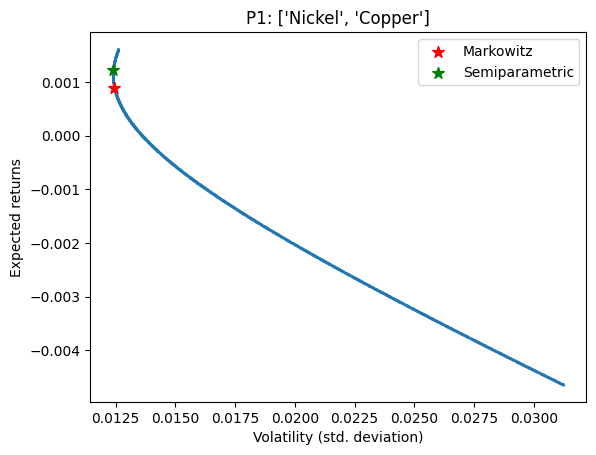

P2


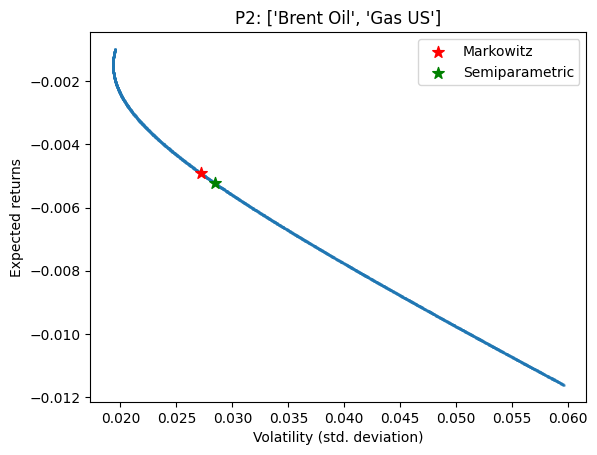

P3


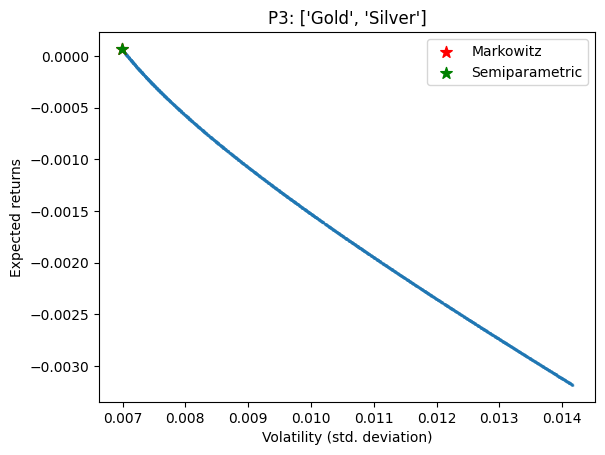

P4


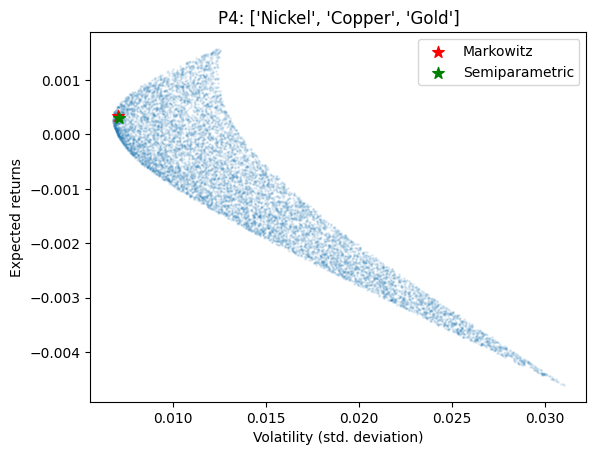

P5


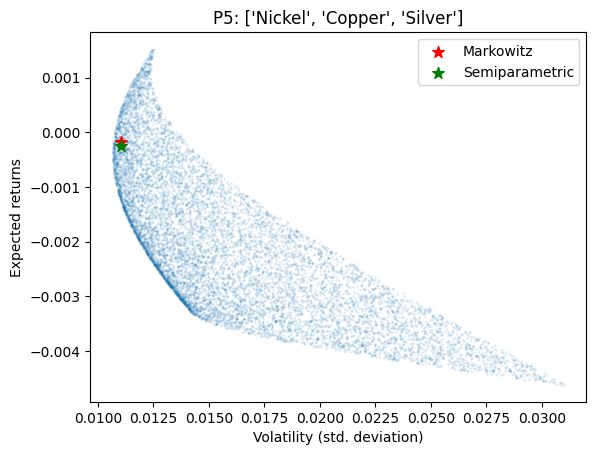

P6


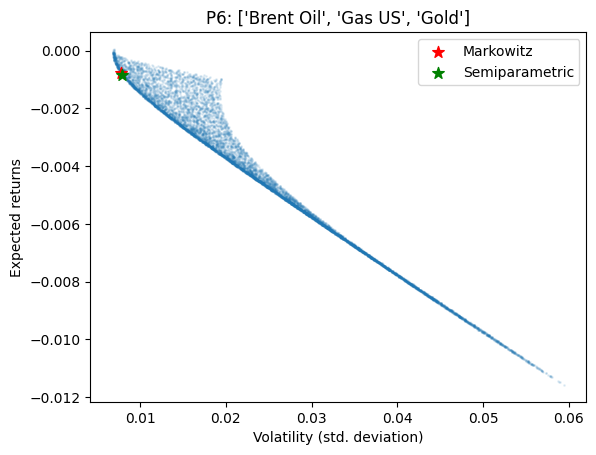

P7


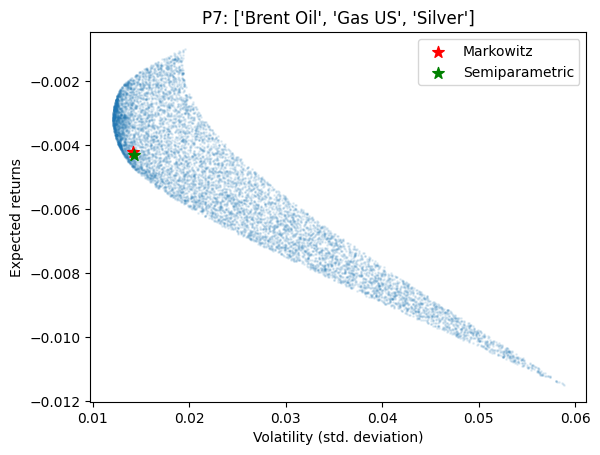

In [8]:
np.random.seed(RANDOM_SEED)

testing_df = pd.DataFrame()
for portfolio, assets in SELECTED_PORTFOLIOS.items():
    print(portfolio)
    testing_portfolio = X_test[assets]
    markowitz_return = portfolio_return(testing_portfolio, list(markowitz_weights[portfolio].values()))
    semiparametric_return = portfolio_return(testing_portfolio, list(semiparametric_weights[portfolio].values()))
    markowitz_volatility = portfolio_volatility(testing_portfolio, list(markowitz_weights[portfolio].values()))
    semiparametric_volatility = portfolio_volatility(testing_portfolio, list(semiparametric_weights[portfolio].values()))

    row = pd.DataFrame({
        'Portfolio': [portfolio],
        'Assets': [assets],
        'Markowitz weights': [list(markowitz_weights[portfolio].values())],
        'Semiparametric weights': [list(semiparametric_weights[portfolio].values())],
        'Markowitz return': [markowitz_return],
        'Semiparametric return': [semiparametric_return],
        'Markowitz volatility': [markowitz_volatility],
        'Semiparametric volatility': [semiparametric_volatility]
    })
    testing_df = pd.concat([testing_df, row], ignore_index=True)

    simulated_df = pd.DataFrame()
    for i in range(0, WEIGHT_SIMULATIONS):
        weight_sim = np.random.dirichlet(np.ones(len(assets)), size=1)[0]

        sim_portfolio_return = portfolio_return(testing_portfolio, weight_sim)
        sim_portfolio_volatility = portfolio_volatility(testing_portfolio, weight_sim)

        row = pd.DataFrame({
            'weights': [weight_sim],
            'exp_return': [sim_portfolio_return],
            'volatility': [sim_portfolio_volatility]
        })
        simulated_df = pd.concat([simulated_df, row], ignore_index=True)

    plt.title(f'{portfolio}: {assets}')
    plt.scatter(x=simulated_df['volatility'], y=simulated_df['exp_return'], alpha=0.1, s=1)
    plt.scatter(x=markowitz_volatility, y=markowitz_return, s=75, marker='*', color='red', label='Markowitz')
    plt.scatter(x=semiparametric_volatility, y=semiparametric_return, s=75, marker='*', color='green', label='Semiparametric')
    plt.xlabel('Volatility (std. deviation)')
    plt.ylabel('Expected returns')
    plt.legend()
    plt.show()

benchmark = X_test[SELECTED_BENCHMARK]
benchmark_return = benchmark.mean()
benchmark_volatility = benchmark.std()
testing_df[f'Benchmark: {SELECTED_BENCHMARK} return'] = benchmark_return
testing_df[f'Benchmark: {SELECTED_BENCHMARK} volatility'] = benchmark_volatility
testing_df['Markowitz Sharpe'] = ((
    testing_df['Markowitz return'] - testing_df[f'Benchmark: {SELECTED_BENCHMARK} return'])
    /testing_df['Markowitz volatility'])
testing_df['Semiparametric Sharpe'] = ((
    testing_df['Semiparametric return'] - testing_df[f'Benchmark: {SELECTED_BENCHMARK} return'])
    /testing_df['Semiparametric volatility'])

# Add seperate tables for Markowitz and Copula for easier data visualization
markowitz_testing_df, semiparametric_testing_df = deepcopy(testing_df), deepcopy(testing_df)
markowitz_testing_df['Portfolio'] = markowitz_testing_df['Portfolio']+'.m'
markowitz_testing_df = markowitz_testing_df[
    ['Portfolio', 'Assets', 'Markowitz weights', 'Markowitz return', 'Markowitz volatility', 'Markowitz Sharpe']]
semiparametric_testing_df['Portfolio'] = semiparametric_testing_df['Portfolio']+'.c'
semiparametric_testing_df = semiparametric_testing_df[
    ['Portfolio', 'Assets', 'Semiparametric weights', 'Semiparametric return', 'Semiparametric volatility', 'Semiparametric Sharpe']]


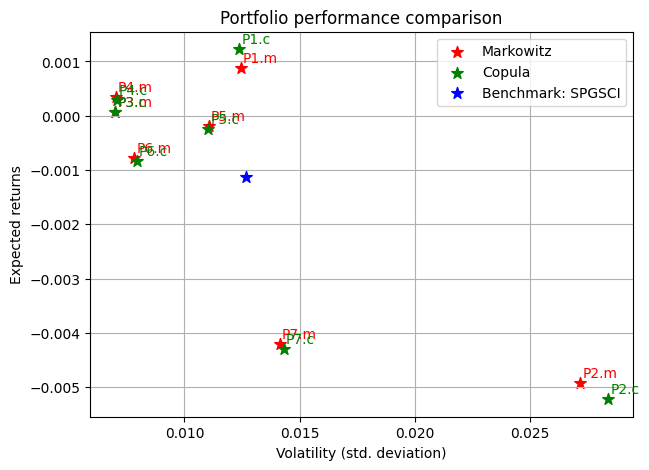

In [9]:
#plt.style.use('ggplot')
plt.figure(figsize=(7,5))
# Markowitz portfolios
plt.scatter(
    x=markowitz_testing_df['Markowitz volatility'],
    y=markowitz_testing_df['Markowitz return'], s=75, marker='*', color='red', label='Markowitz')
for i in range(len(markowitz_testing_df)): 
    plt.annotate(
        markowitz_testing_df['Portfolio'][i],
        (markowitz_testing_df['Markowitz volatility'][i]+0.0001, markowitz_testing_df['Markowitz return'][i]+0.0001),
        color='red') 
# Copula portfolio
plt.scatter(
    x=semiparametric_testing_df['Semiparametric volatility'],
    y=semiparametric_testing_df['Semiparametric return'], s=75, marker='*', color='green', label='Copula')
for i in range(len(semiparametric_testing_df)): 
    plt.annotate(
        semiparametric_testing_df['Portfolio'][i],
        (semiparametric_testing_df['Semiparametric volatility'][i]+0.0001, semiparametric_testing_df['Semiparametric return'][i]+0.0001),
        color='green')
# Benchmark
plt.scatter(x=benchmark_volatility, y=benchmark_return, s=75, marker='*', color='blue', label=f'Benchmark: {SELECTED_BENCHMARK}')

plt.title('Portfolio performance comparison')
plt.grid()
plt.legend()
plt.xlabel('Volatility (std. deviation)')
plt.ylabel('Expected returns')
plt.show()

In [10]:
testing_df

,Portfolio,Assets,Markowitz weights,Semiparametric weights,Markowitz return,Semiparametric return,Markowitz volatility,Semiparametric volatility,Benchmark: SPGSCI return,Benchmark: SPGSCI volatility,Markowitz Sharpe,Semiparametric Sharpe
0,P1,"[Nickel, Copper]","[0.11617258901376326, 0.8838274109862367]","[0.06195120241016062, 0.9380487975898394]",0.000886,0.001225,0.012443,0.012392,-0.001127,0.012666,0.161782,0.189830
1,P2,"[Brent Oil, Gas US]","[0.6295683044292459, 0.37043169557075406]","[0.6007604017210908, 0.3992395982789092]",-0.004916,-0.005223,0.027186,0.028411,-0.001127,0.012666,-0.139367,-0.144153
2,P3,"[Gold, Silver]","[1.0, 2.981555903564778e-24]","[1.0, 3.0086609517479387e-24]",0.000070,0.000070,0.006987,0.006987,-0.001127,0.012666,0.171280,0.171280
3,P4,"[Nickel, Copper, Gold]","[0.023469526719340324, 0.24929913939933515, 0....","[0.03125311100579825, 0.24301871764888655, 0.7...",0.000344,0.000297,0.007014,0.007059,-0.001127,0.012666,0.209706,0.201777
4,P5,"[Nickel, Copper, Silver]","[0.07691998924346892, 0.6491404647333063, 0.27...","[0.07570828717305957, 0.6346691244737211, 0.28...",-0.000182,-0.000250,0.011055,0.011021,-0.001127,0.012666,0.085460,0.079588
5,P6,"[Brent Oil, Gas US, Gold]","[0.06796957361768792, 0.06665632103913237, 0.8...","[0.08032364139623345, 0.07017634721530264, 0.8...",-0.000780,-0.000834,0.007803,0.007932,-0.001127,0.012666,0.044438,0.036908
6,P7,"[Brent Oil, Gas US, Silver]","[0.21376301180274818, 0.17633135219804225, 0.6...","[0.19679126504353436, 0.18306372960471637, 0.6...",-0.004198,-0.004292,0.014137,0.014305,-0.001127,0.012666,-0.217239,-0.221281


In [11]:
rounded_testing_df = deepcopy(testing_df)
rounded_testing_df['Markowitz weights'] = [np.around(i, 4) for i in testing_df['Markowitz weights'].values]
rounded_testing_df['Semiparametric weights'] = [np.around(i, 4) for i in testing_df['Semiparametric weights'].values]

rounded_testing_df

,Portfolio,Assets,Markowitz weights,Semiparametric weights,Markowitz return,Semiparametric return,Markowitz volatility,Semiparametric volatility,Benchmark: SPGSCI return,Benchmark: SPGSCI volatility,Markowitz Sharpe,Semiparametric Sharpe
0,P1,"[Nickel, Copper]","[0.1162, 0.8838]","[0.062, 0.938]",0.000886,0.001225,0.012443,0.012392,-0.001127,0.012666,0.161782,0.189830
1,P2,"[Brent Oil, Gas US]","[0.6296, 0.3704]","[0.6008, 0.3992]",-0.004916,-0.005223,0.027186,0.028411,-0.001127,0.012666,-0.139367,-0.144153
2,P3,"[Gold, Silver]","[1.0, 0.0]","[1.0, 0.0]",0.000070,0.000070,0.006987,0.006987,-0.001127,0.012666,0.171280,0.171280
3,P4,"[Nickel, Copper, Gold]","[0.0235, 0.2493, 0.7272]","[0.0313, 0.243, 0.7257]",0.000344,0.000297,0.007014,0.007059,-0.001127,0.012666,0.209706,0.201777
4,P5,"[Nickel, Copper, Silver]","[0.0769, 0.6491, 0.2739]","[0.0757, 0.6347, 0.2896]",-0.000182,-0.000250,0.011055,0.011021,-0.001127,0.012666,0.085460,0.079588
5,P6,"[Brent Oil, Gas US, Gold]","[0.068, 0.0667, 0.8654]","[0.0803, 0.0702, 0.8495]",-0.000780,-0.000834,0.007803,0.007932,-0.001127,0.012666,0.044438,0.036908
6,P7,"[Brent Oil, Gas US, Silver]","[0.2138, 0.1763, 0.6099]","[0.1968, 0.1831, 0.6201]",-0.004198,-0.004292,0.014137,0.014305,-0.001127,0.012666,-0.217239,-0.221281
